In [45]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.special import inv_boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import root_mean_squared_error, median_absolute_error

In [46]:
# import the data and  drop no longer needed columns including redundant first category
video_df = pd.read_csv("data/videos_prepared.csv")

remove_columns = ["video_id", "title", "channel_title", "cat_Comedy"]
video_df.drop(columns=remove_columns, inplace=True)
video_df.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
0,0,0,6,11,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,20,4,4,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,18,3,10,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,19,0,11,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,20,2,10,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [47]:
# split into features and target variable
X = video_df.drop(columns="box_view_rate")
y = video_df["box_view_rate"]

# split into training and test data
SEED = 666
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
50,0,11,0,11,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
309,0,19,1,9,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,12,3,5,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
364,0,17,4,4,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,16,3,1,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
# load fitted lambda and back transform box cox test target values
with open("data/fitted_lambda.pkl", "rb") as f:
    fitted_lambda = pickle.load(f)

y_test_original = inv_boxcox(y_test, fitted_lambda)

In [49]:
# instantiate the scaler, fit it to training data and transform training and test features
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,caption,hour_published,weekday_published,month_published,is_short,hd,tag_vegan,tag_veganism,tag_animal rights,tag_earthling ed|earthlinged,...,cat_Gaming,cat_Howto & Style,cat_Music,cat_News & Politics,cat_Nonprofits & Activism,cat_People & Blogs,cat_Pets & Animals,cat_Science & Technology,cat_Sports,cat_Travel & Events
50,-0.356200,-0.497947,-1.447714,1.425305,-0.803954,0.285886,-1.013423,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,-0.215666,-0.702398,2.047513,-0.196116,-0.291906,-0.038519,-0.094703
309,-0.356200,0.755625,-0.936623,0.844513,1.243853,0.285886,-1.013423,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,4.636809,-0.702398,-0.488397,-0.196116,-0.291906,-0.038519,-0.094703
535,2.807415,-0.341250,0.085561,-0.317069,-0.803954,0.285886,0.986754,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,4.636809,-0.702398,-0.488397,-0.196116,-0.291906,-0.038519,-0.094703
364,-0.356200,0.442232,0.596652,-0.607465,-0.803954,0.285886,0.986754,1.730342,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,-0.215666,-0.702398,-0.488397,-0.196116,-0.291906,-0.038519,-0.094703
346,-0.356200,0.285536,0.085561,-1.478651,1.243853,0.285886,0.986754,-0.577920,-0.460271,-0.33196,...,-0.054514,-0.179193,-0.109517,-0.215666,-0.702398,2.047513,-0.196116,-0.291906,-0.038519,-0.094703


In [50]:
# find the optimal alpha value using lasso for feature selection to fit linear regression using r2 and rmse metrics
alpha = [0.001, 0.01, 0.1, 0.2, 0.3]
r2 = []
box_rmse = []
original_rmse = []
medae = []

for a in alpha:
    lasso = Lasso(alpha=a, max_iter=6000)
    lasso.fit(X_train_scaled, y_train)
    X_train = X_train_scaled.iloc[:, lasso.coef_ > 0]
    X_test = X_test_scaled.iloc[:, lasso.coef_ > 0]
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    y_pred_original = inv_boxcox(y_pred, fitted_lambda)
    r2.append(round(linreg.score(X_test, y_test), 2))
    box_rmse.append(round(root_mean_squared_error(y_test, y_pred), 2))
    original_rmse.append(round(root_mean_squared_error(y_test_original, y_pred_original), 2))
    medae.append(round(median_absolute_error(y_test_original, y_pred_original), 2))

alpha_scores = pd.DataFrame({"alpha": alpha, "r2": r2, "box_rmse": box_rmse, "original_rmse": original_rmse, "medae": medae})
alpha_scores

,alpha,r2,box_rmse,original_rmse,medae
0,0.001,0.67,1.91,512.48,16.56
1,0.010,0.68,1.88,484.06,18.52
2,0.100,0.60,2.09,549.22,17.95
3,0.200,0.52,2.28,572.39,17.88
4,0.300,0.47,2.40,580.25,17.89


In [51]:
# use optimal alpha value for lasso
lasso = Lasso(alpha=alpha_scores["alpha"][alpha_scores["r2"] == alpha_scores["r2"].max()].iloc[0], max_iter=6000)
lasso.fit(X_train_scaled, y_train)
X_train_lasso = X_train_scaled.iloc[:, lasso.coef_ > 0]
X_test_lasso = X_test_scaled.iloc[:, lasso.coef_ > 0]
X_train_lasso.head()

,caption,month_published,tag_animals,tag_vegetarian,tag_debate,tag_count,term_20,term_42td,term_50,term_abamb,...,term_world,term_youtu,log_channel_view_count,log_channel_sub_count,log_duration_seconds,cat_Education,cat_Howto & Style,cat_Music,cat_People & Blogs,cat_Sports
50,-0.356200,1.425305,-0.326431,-0.342855,-0.384655,-0.938941,-0.266306,-0.233043,-0.185278,-0.233043,...,1.375163,-0.441402,-0.950910,-0.737212,0.834432,-0.285886,-0.179193,-0.109517,2.047513,-0.038519
309,-0.356200,0.844513,-0.326431,-0.342855,-0.384655,-0.938941,-0.266306,-0.233043,-0.185278,-0.233043,...,-0.250888,-0.441402,0.824070,0.989065,-0.970489,-0.285886,-0.179193,-0.109517,-0.488397,-0.038519
535,2.807415,-0.317069,-0.326431,-0.342855,-0.384655,-0.022183,-0.266306,-0.233043,-0.185278,-0.233043,...,-0.250888,0.100642,0.824070,0.989065,0.116304,-0.285886,-0.179193,-0.109517,-0.488397,-0.038519
364,-0.356200,-0.607465,-0.326431,-0.342855,-0.384655,1.200160,3.015527,-0.233043,2.429764,-0.233043,...,-0.250888,1.696707,0.385818,0.099039,0.731137,-0.285886,-0.179193,-0.109517,-0.488397,-0.038519
346,-0.356200,-1.478651,-0.326431,-0.342855,-0.384655,1.352953,-0.266306,-0.233043,-0.185278,-0.233043,...,-0.250888,-0.441402,-1.475162,-2.045863,-1.288972,-0.285886,-0.179193,-0.109517,2.047513,-0.038519


In [52]:
# fit the linear regression model to the feature extracted data
linreg = LinearRegression()
linreg.fit(X_train_lasso, y_train)
y_pred = linreg.predict(X_test_lasso)
y_pred_original = inv_boxcox(y_pred, fitted_lambda)
r2 = linreg.score(X_test_lasso, y_test)
box_rmse = root_mean_squared_error(y_test, y_pred)
original_rmse = root_mean_squared_error(y_test_original, y_pred_original)
medae = median_absolute_error(y_test_original, y_pred_original)
print(f"r2: {round(r2, 2)}, box_rmse: {round(box_rmse, 2)}, original_rmse: {round(original_rmse, 2)}, medae: {round(medae, 2)}")

r2: 0.68, box_rmse: 1.88, original_rmse: 484.06, medae: 18.52


In [53]:
# list the coefficients by highest absolute value for positive or negative impact on view count
coef_df = pd.Series(linreg.coef_, index=X_train_lasso.columns).sort_values(key=abs, ascending=False)
top_coef = coef_df.head(20)
top_coef

log_channel_view_count    0.979638
log_channel_sub_count     0.734646
term_vegangains           0.652126
term_truth                0.514153
cat_Education             0.486453
term_joeycarbstrong       0.474661
term_sub                  0.472499
log_duration_seconds     -0.464630
term_eat                  0.355459
term_omni                 0.354965
term_carnivore            0.306926
term_debate               0.305851
term_davidractivism      -0.305479
term_pubmed               0.301547
cat_Howto & Style         0.297717
term_protein              0.281452
term_socials              0.264586
term_supplements          0.259132
term_supporter            0.256585
term_join                -0.253986
dtype: float64

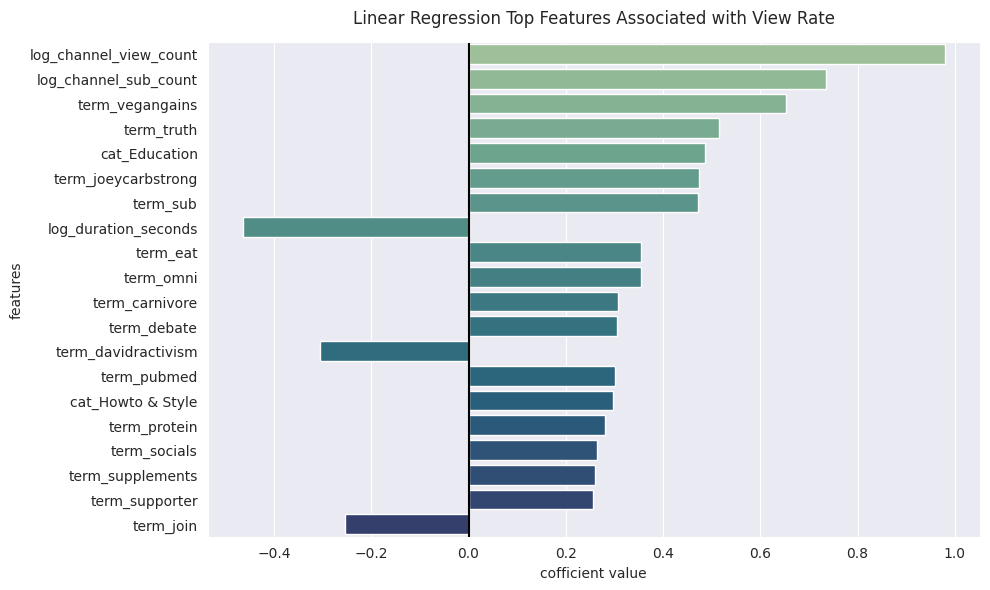

In [54]:
# visualize top feature coefficients
sns.set_style("darkgrid")
plt.subplots(figsize=(10, 6))
sns.barplot(x=top_coef.values, y=top_coef.index, palette="crest", hue=top_coef.index, legend=False, orient="h")
plt.axvline(0, color="black")
plt.title("Linear Regression Top Features Associated with View Rate", y=1.02)
plt.ylabel("features")
plt.xlabel("cofficient value")
plt.tight_layout()

# save png
plt.savefig("images/linreg_top_features.png", dpi=300)

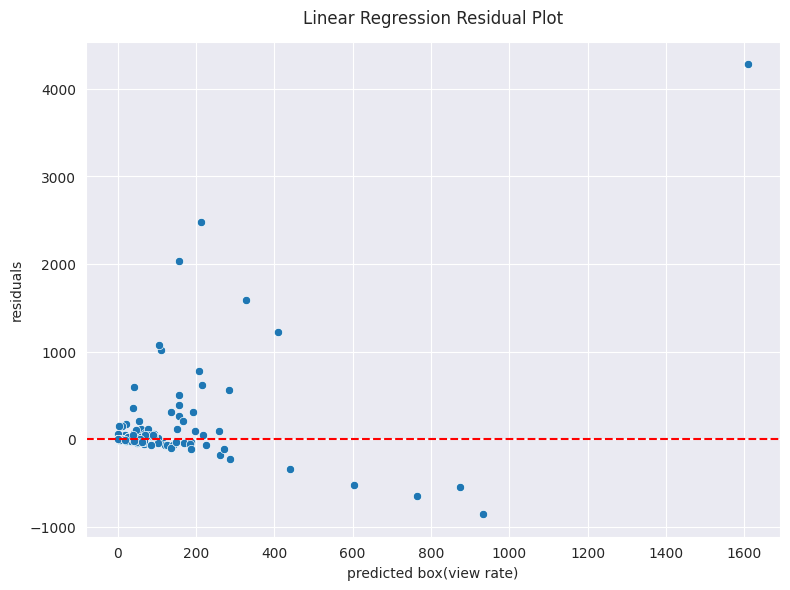

In [55]:
# visualize residuals to look for patterns
residuals = y_test_original - y_pred_original
plt.subplots(figsize=(8, 6))
sns.scatterplot(x=y_pred_original, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("predicted box(view rate)")
plt.ylabel("residuals")
plt.title("Linear Regression Residual Plot", y=1.02)
plt.tight_layout()

# save png
# plt.savefig("images/linreg_residual_plot")

In [56]:
residuals.sort_values(key=abs, ascending=False).head(10)

616    4282.394558
224    2481.885183
81     2035.724464
225    1593.710446
464    1224.181123
466    1070.500714
17     1019.849809
773    -856.483992
649     776.820133
685    -647.326028
Name: box_view_rate, dtype: float64

In [57]:
video_df = pd.read_csv("data/videos_prepared.csv")
video_df.iloc[616]

video_id                                                          0VHK8wpFci4
title                       The breakfast that helped me lose 40lbs as a v...
channel_title                                                     Chelsea Mae
caption                                                                     0
hour_published                                                             18
                                                  ...                        
cat_People & Blogs                                                          1
cat_Pets & Animals                                                          0
cat_Science & Technology                                                    0
cat_Sports                                                                  0
cat_Travel & Events                                                         0
Name: 616, Length: 343, dtype: object

In [26]:
# re-load video dataframe for video information
video_df = pd.read_csv("data/videos_prepared.csv")

# highest channel view count videos by highest video view rate
video_df["max_view_rate"] = video_df["box_view_rate"].max()
top_10_chan_view_count = video_df[["channel_title", "title", "log_channel_view_count", "box_view_rate", "max_view_rate"]].sort_values(["log_channel_view_count", "box_view_rate"], ascending=False).head(10)
top_10_chan_view_count

,channel_title,title,log_channel_view_count,box_view_rate,max_view_rate
34,TEDx Talks,Every Argument Against Veganism | Ed Winters |...,22.860034,8.579509,12.066686
715,TEDx Talks,A Plant-based Diet Changed My Life | Pat McAul...,22.860034,7.965115,12.066686
157,TEDx Talks,The Power of Plant-Based Eating | Dr. Joanne K...,22.860034,7.054742,12.066686
239,TEDx Talks,Why I'm A Vegan | Moby | TEDxVeniceBeach,22.860034,6.654406,12.066686
724,TEDx Talks,The Transformative Power of Raw Vegan Food | R...,22.860034,3.952670,12.066686
71,Brut India,Joaquin Phoenix On Why He's Vegan,22.074043,7.363395,12.066686
672,Brut India,Joaquin Phoenix's Powerful Speech on the Envir...,22.074043,2.553250,12.066686
297,Best Of TRS | English,Why Everyone Must Turn Vegetarian? Monk Explai...,20.649403,9.181316,12.066686
98,Big Think,Peter Singer: Animal suffering is human respon...,20.628524,7.224880,12.066686
574,Fitshortie,What I Eat As A Long-Term Raw Vegan,20.565845,9.062872,12.066686


In [27]:
# highest sub view rate
top_10_sub = video_df[["channel_title", "title", "term_sub", "box_view_rate", "max_view_rate"]][video_df["term_sub"] > 0].sort_values(["box_view_rate"], ascending=False).head(10)
top_10_sub

,channel_title,title,term_sub,box_view_rate,max_view_rate
758,David Ramms,Vegan RAGES At Fresh Chicken Nugget Video,0.088870,10.543854,12.066686
7,Mic the Vegan,Cardio vs. Weights: What Actually Helps You Li...,0.040760,9.034174,12.066686
73,David Ramms,Vegan RAGES At Piers Morgan By Playing Bingo (...,0.087788,8.805436,12.066686
257,David Ramms,Tristan Tate DESTROYS vegan with Christianity ✝️,0.086220,6.383796,12.066686
838,Choosing My Health,Before & After My Vegan Diet AND What I’m Doin...,0.027858,6.377017,12.066686
601,David Ramms,When Trolling A Vegetarian BACKFIRES (Instant ...,0.086842,6.097575,12.066686
16,David Ramms,Vegan RAGES at Uncle Roger vs Vegan Video,0.088819,5.003152,12.066686
235,David Ramms,Angry meat eater attacks vegans 😲,0.092584,4.615117,12.066686
405,David Ramms,Vegan RAGES at Bringing Meat To A Vegan Restau...,0.089148,4.520905,12.066686
90,David Ramms,Vegan RAGES at the Worst TikTok Carnivore Cringe,0.088934,4.460120,12.066686


In [28]:
# highest joey carbstrong view rate
top_10_joeycarbstrong = video_df[["channel_title", "title", "term_joeycarbstrong", "box_view_rate", "max_view_rate"]][video_df["term_joeycarbstrong"] > 0].sort_values(["box_view_rate"], ascending=False).head(10)
top_10_joeycarbstrong

,channel_title,title,term_joeycarbstrong,box_view_rate,max_view_rate
345,Joey Carbstrong,I could get sued for releasing this,0.606633,10.490303,12.066686
224,Joey Carbstrong,I left secret cameras in a HALAL Slaughterhous...,0.513909,10.057655,12.066686
81,Joey Carbstrong,BREAKING: WORLD-FIRST EXPOSÉ | HUGE EGG HEN GA...,0.541405,9.729917,12.066686
295,Joey Carbstrong,Media attend Halal Slaughterhouse after shocki...,0.551424,9.147584,12.066686
406,Joey Carbstrong,Dairy Farmer DESTROYS Vegan Activist!,0.538400,8.554261,12.066686
667,Joey Carbstrong,BREAKING: Horror Halal slaughterhouse SHUTS DO...,0.538784,8.482269,12.066686
221,Joey Carbstrong,Muslims react to HALAL slaughter footage,0.493178,8.353002,12.066686
96,Joey Carbstrong,Pigeon kicking punk instantly regrets it (lear...,0.606633,8.274491,12.066686
22,Joey Carbstrong,"Well, that escalated quickly…",0.595599,8.109740,12.066686
324,Joey Carbstrong,Spiritual meat eating animal activist debates ...,0.589007,7.700707,12.066686


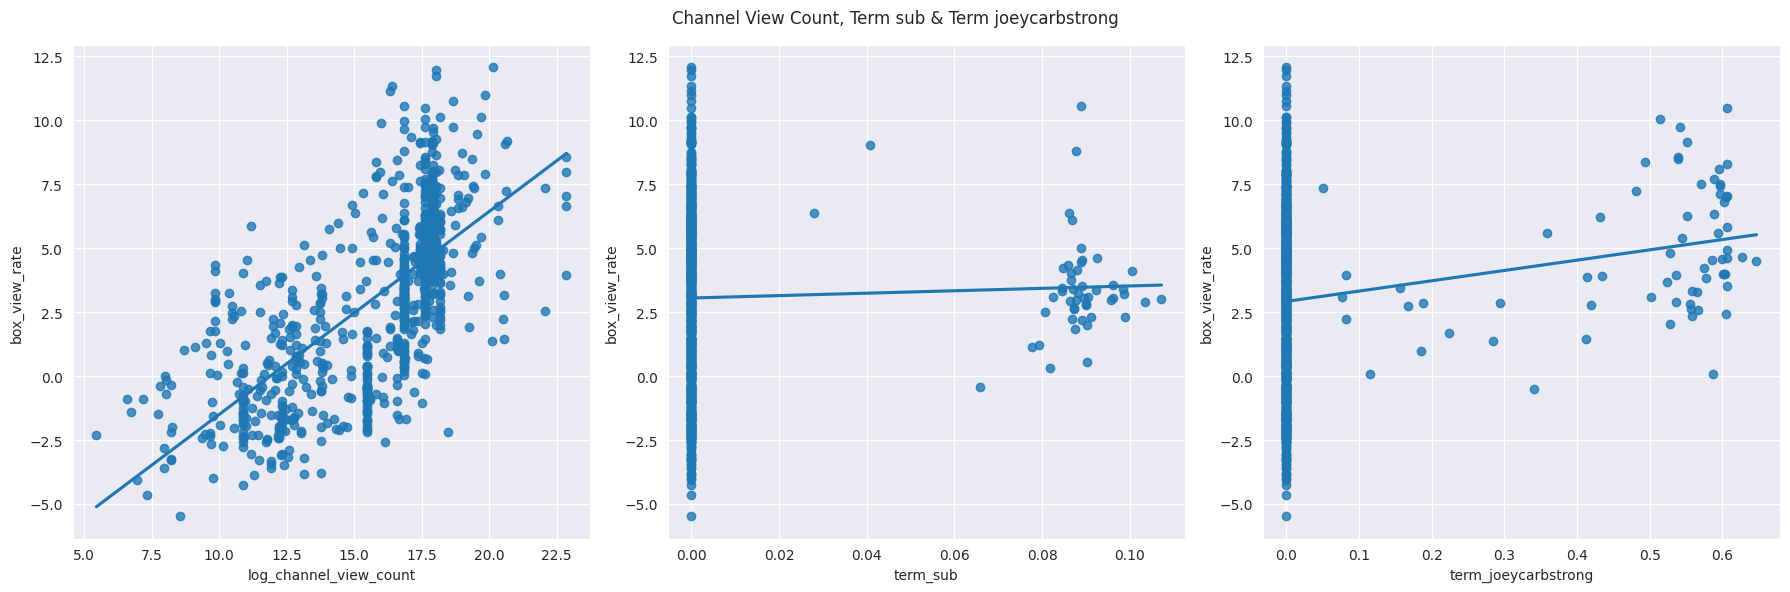

In [29]:
# visualize individual regression lines of coefficients with highest impact on view count
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Channel View Count, Term sub & Term joeycarbstrong")
sns.regplot(ax=axes[0], data=video_df, x="log_channel_view_count", y="box_view_rate", ci=None)
sns.regplot(ax=axes[1], data=video_df, x="term_sub", y="box_view_rate", ci=None)
sns.regplot(ax=axes[2], data=video_df, x="term_joeycarbstrong", y="box_view_rate", ci=None)
plt.tight_layout()

plt.savefig("images/top_coefficient_regression_lines.png")